# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml


In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [5]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [30]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 1/7, random_state = 0)
X_train.shape

(60000, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

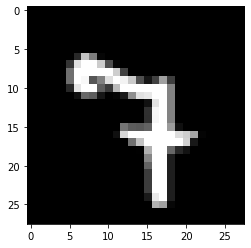

In [28]:
plt.imshow(np.reshape(X_train[0,:],(28,28)), cmap='gray')

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

0.5

In [55]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_gaus = GaussianNB()
clf_gaus.fit(X_train, X_test)
nb_pred = clf_gaus.predict(X_train)
print("Acc gauss: ",accuracy_score(X_test,nb_pred))
print("CM gauss: ", confusion_matrix(X_test,nb_pred))

Acc gauss:  0.5568666666666666
CM gauss:  [[5155   11   31   13   11   11  251    5  322   97]
 [   3 6366   15   23    3   14   82    2  166   62]
 [ 470  163 1813  297   29   26 1582   15 1476   79]
 [ 312  312   54 1878   12   11  397   54 2546  552]
 [ 129   45   44   25  909   35  622   33 1289 2731]
 [ 524  151   32   96   31  253  341   12 3493  517]
 [  40  103   27    2    5   19 5564    0  120    7]
 [  21   53    7   44   37    5   21 1969  230 3842]
 [  87  775   21   36   22   33  116    9 3857  906]
 [  31   45   16    9   33    2    5   81  119 5648]]


In [56]:
# simple linear model
from sklearn.linear_model import SGDClassifier

clf_linear = SGDClassifier(max_iter=50 ,loss='log')
clf_linear.fit(X_train,X_test)
linear_pred = clf_linear.predict(X_train)
print("Acc linear: ",accuracy_score(X_test,linear_pred))
print("CM linear: ", confusion_matrix(X_test,linear_pred))

C:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Acc linear:  0.8904333333333333
CM linear:  [[5518    1   61   68   17  110   41    9   82    0]
 [   1 6485   54   48   10   28    4    7   90    9]
 [  11   19 5302  251   81   27   59   36  154   10]
 [   1    7  140 5726    9  110   14   18   63   40]
 [   4   15   40   74 5385   31   43   18   71  181]
 [  15   16   67  345   66 4592   86   10  221   32]
 [  19   13  134   12   21   76 5562    8   41    1]
 [  10   12  121  199   65   43    7 5598   17  157]
 [  25   75  153  461   43  299   35   48 4662   61]
 [  24   18   40  252  301  128    0  491  139 4596]]


In [58]:
# random forest
from sklearn.ensemble import RandomForestClassifier

clf_random = RandomForestClassifier()
clf_random.fit(X_train, X_test)
random_pred = clf_random.predict(X_train)
print("Acc random: ",accuracy_score(X_test,random_pred))
print("CM random: ", confusion_matrix(X_test,random_pred))

Acc random:  1.0
CM random:  [[5907    0    0    0    0    0    0    0    0    0]
 [   0 6736    0    0    0    0    0    0    0    0]
 [   0    0 5950    0    0    0    0    0    0    0]
 [   0    0    0 6128    0    0    0    0    0    0]
 [   0    0    0    0 5862    0    0    0    0    0]
 [   0    0    0    0    0 5450    0    0    0    0]
 [   0    0    0    0    0    0 5887    0    0    0]
 [   0    0    0    0    0    0    0 6229    0    0]
 [   0    0    0    0    0    0    0    0 5862    0]
 [   0    0    0    0    0    0    0    0    0 5989]]


### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [63]:
# compute the test accuracy
nb_pred = clf_gaus.predict(y_train)
linear_pred = clf_linear.predict(y_train)
random_pred = clf_random.predict(y_train)

print("Accuracy on Test data: \nNB: %.02f\nLinear: %.02f\nRandom: %.02f" % (accuracy_score(y_test,nb_pred), accuracy_score(y_test,linear_pred), accuracy_score(y_test,random_pred)))

Accuracy on Test data: 
NB: 0.56
Linear: 0.87
Random: 0.97


In [66]:
# f-measure
from sklearn.metrics import f1_score
nb_f1 = f1_score(y_test, nb_pred, average='micro')
linear_f1 = f1_score(y_test, linear_pred, average='micro')
random_f1 = f1_score(y_test, random_pred, average='micro')

print("F1-measure on Test data: \nNB: %.02f\nLinear: %.02f\nRandom: %.02f" % (nb_f1, linear_f1, random_f1))

F1-measure on Test data: 
NB: 0.56
Linear: 0.87
Random: 0.97


In [109]:
# ROC curves
from sklearn import metrics

y_five = y_test=='5'
bayes_five = clf_gaus.predict(y_train).astype(int)==5
linear_five = clf_linear.predict(y_train).astype(int)==5
rf_five = clf_random.predict(y_train).astype(int)==5

bayes_fpr, bayes_tpr, _ = metrics.roc_curve(y_five, bayes_five)
linear_fpr, linear_tpr, _ = metrics.roc_curve(y_five, linear_five)
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_five, rf_five)

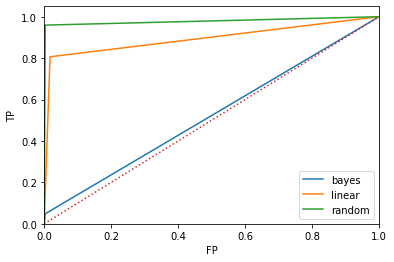

In [110]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr,label='bayes')
plt.plot(linear_fpr, linear_tpr, label='linear')
plt.plot(rf_fpr, rf_tpr, label='random')
plt.plot([0, 1], [0, 1], linestyle=':')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP')
plt.ylabel('TP')
plt.show()
